### EXPLORATORY DATA ANALYSIS

En este EDA, encontrará todo el proceso de ETL, selección de características y entrenamiento de modelos para predecir puntajes de felicidad basados ​​en ciertas características.

Importar las librerias necesarias.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Leer datos 2015.

In [2]:
data_2015_csv = '../data/2015.csv'
data_2015 = pd.read_csv(data_2015_csv, delimiter=',')
print(data_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

 Los datos de 2015 se han cargado correctamente y no presentan valores nulos, con 158 filas y 12 columnas.

In [3]:
data_2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Al visualizar los primeros cinco registros con head(), se observa que las variables como Happiness Score, Economy (GDP per Capita), Family, y Health (Life Expectancy) están bien formateadas y son numéricas.

In [4]:
data_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


Se realiza un resumen estadístico donde se puede ver la media, desviación estándar, mínimos, máximos, y los percentiles de las variables como el Happiness Score, Economy (GDP per Capita), y otras.

Leer datos 2016.

In [5]:
data_2016_csv = '../data/2016.csv'
data_2016 = pd.read_csv(data_2016_csv, delimiter=',')
print(data_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Los datos de 2016 contienen 157 entradas y 13 columnas, lo cual incluye nuevas columnas como Lower Confidence Interval y Upper Confidence Interval, y tampoco hay valores nulos en ninguna columna.

In [6]:
data_2016.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


En estas primeras cinco filas del dataset de 2016. Se pueden ver columnas adicionales que no estaban presentes en 2015, como el Lower Confidence Interval y el Upper Confidence Interval.
Estas nuevas columnas proporcionan información sobre el rango de confianza para el puntaje de felicidad.

In [7]:
data_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


Se realiza un resumen estadístico donde datos como la media y desviación estándar, indican algunas diferencias en variables clave como el Happiness Score, Economy (GDP per Capita) y Generosity comparado con el año anterior.

Por ejemplo, el puntaje promedio de felicidad en 2016 es de 5.38, un poco menor que el de 2015, que era de 5.53.

Leer datos 2017.

In [8]:
data_2017_csv = '../data/2017.csv'
data_2017 = pd.read_csv(data_2017_csv, delimiter=',')
print(data_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

El dataset de 2017 contiene 155 entradas y 12 columnas.
Algunas de las columnas están nombradas de manera diferente, como Whisker.high y Whisker.low, que probablemente se refieren a los intervalos de confianza del puntaje de felicidad, aunque están nombradas de forma distinta en comparación con el dataset de 2016.
Además no hay columnas con valores nulos.

In [9]:
data_2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Se muestra la información de los primeros cinco países. Las variables clave, como Happiness Score, Economy (GDP per Capita), y Dystopia Residual, siguen presentes.

In [10]:
data_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


Observamos en el análisis estadístico que el puntaje promedio de felicidad en 2017 es 5.34, algo más bajo que en 2016 (5.38) y 2015 (5.53).

Leer datos 2018.

In [11]:
data_2018_csv = '../data/2018.csv'
data_2018 = pd.read_csv(data_2018_csv, delimiter=',')
print(data_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


El dataset de 2018 contiene 156 entradas y 9 columnas, menos columnas que los datasets de los años anteriores.

Además observamos que tampoco hay valores nulos en las columnas.

In [12]:
data_2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [13]:
data_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
GDP per capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
Social support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
Healthy life expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
Freedom to make life choices,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
Perceptions of corruption,155.0,0.112000,0.096492,0.000,0.05100,0.0820,0.13700,0.457


Las estadísticas de resumen muestran que el puntaje de felicidad promedio en 2018 es de 5.37, ligeramente superior al de 2017 (5.34), pero inferior al de años anteriores como 2016 y 2015.
El GDP per capita tiene un rango amplio, con un valor máximo de 2.09 y un mínimo de 0.0, lo que podría sugerir diferencias significativas entre países.
La columna Perceptions of corruption tiene algunos valores nulos, pero el resto de las variables están completas.

Leer datos 2019.

In [14]:
data_2019_csv = '../data/2019.csv'
data_2019 = pd.read_csv(data_2019_csv, delimiter=',')
print(data_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


El dataset de 2019 contiene 156 entradas y 9 columnas. Además no hay valores nulos en nunguna columna.

In [15]:
data_2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Se muestran los cinco países mejor rankeados en términos de felicidad, con Finlandia encabezando la lista con un puntaje de 7.769.

In [16]:
data_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


El puntaje promedio de felicidad (Score) en 2019 es 5.41, ligeramente superior al de 2018 (5.37), pero dentro del mismo rango general observado en años anteriores.

Compraración del número de filas y columnas.

In [17]:
for year, data in {2015: data_2015, 2016: data_2016, 2017: data_2017, 2018: data_2018, 2019: data_2019}.items():
    print(f"Año {year}: {data.shape[0]} filas, {data.shape[1]} columnas")

Año 2015: 158 filas, 12 columnas
Año 2016: 157 filas, 13 columnas
Año 2017: 155 filas, 12 columnas
Año 2018: 156 filas, 9 columnas
Año 2019: 156 filas, 9 columnas


Las columnas de los años 2015 a 2017 son consistentes en cantidad (12 o 13), mientras que en 2018 y 2019 hay menos columnas (9 en total). 

In [18]:
dfs = {
    2015: data_2015,
    2016: data_2016,
    2017: data_2017,
    2018: data_2018,
    2019: data_2019
}

# Crear un conjunto con todas las columnas únicas de todos los DataFrames
all_columns = list(set().union(*(df.columns for df in [data_2015, data_2016, data_2017, data_2018, data_2019])))

# Crear un DataFrame de comparación
comparison_df = pd.DataFrame({year: [col in df.columns for col in all_columns] for year, df in dfs.items()}, index=all_columns)

# Reemplazar True por 'X' y False por vacío
comparison_df = comparison_df.replace(True, '*').replace(False, '')

# Mostrar el resultado
print(comparison_df)


                              2015 2016 2017 2018 2019
Dystopia Residual                *    *               
Whisker.low                                *          
Happiness Score                  *    *               
Country or region                               *    *
Family                           *    *    *          
Economy..GDP.per.Capita.                   *          
Happiness.Score                            *          
Trust (Government Corruption)    *    *               
Economy (GDP per Capita)         *    *               
Dystopia.Residual                          *          
Generosity                       *    *    *    *    *
Trust..Government.Corruption.              *          
Overall rank                                    *    *
Standard Error                   *                    
Region                           *    *               
Freedom                          *    *    *          
Healthy life expectancy                         *    *
Upper Conf

Algunas columnas están presentes de manera consistente a lo largo de los años, como Country, Happiness Score, GDP per capita, y Generosity.

Otras columnas, como Dystopia Residual y Whisker.high, aparecen en algunos años pero no en otros.

Las columnas Score y Freedom to make life choices comienzan a aparecer a partir de 2018, lo que refleja la estructura diferente de los datasets más recientes.



### Normalizar nombre de columnas.

In [19]:
import re

# Lista de DataFrames que has cargado
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019]

# Función para normalizar los nombres de las columnas
def clean_column_names(df):
    clean_columns = []
    for col in df.columns:
        # Convertir a minúsculas y reemplazar espacios por guiones bajos
        normalized = re.sub(r'[.\(\)]', '_', col.replace(' ', '_').lower())
        # Eliminar caracteres no alfanuméricos excepto guiones bajos
        normalized = re.sub(r'[^a-zA-Z0-9_]', '', normalized)
        # Eliminar guiones bajos consecutivos
        normalized = re.sub(r'_{2,}', '_', normalized)
        # Eliminar guiones bajos al principio o al final
        normalized = normalized.strip('_')
        # Añadir la columna normalizada a la lista
        clean_columns.append(normalized)
    # Asignar las columnas limpias al DataFrame
    df.columns = clean_columns

# Aplicar la función de limpieza a cada DataFrame
for df in dataframes:
    clean_column_names(df)

# Verificar los nombres de las columnas después de la normalización
for year, df in zip([2015, 2016, 2017, 2018, 2019], dataframes):
    print(f"Año {year}: {df.columns}")


Año 2015: Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual'],
      dtype='object')
Año 2016: Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'lower_confidence_interval', 'upper_confidence_interval',
       'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual'],
      dtype='object')
Año 2017: Index(['country', 'happiness_rank', 'happiness_score', 'whisker_high',
       'whisker_low', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'generosity',
       'trust_government_corruption', 'dystopia_residual'],
      dtype='object')
Año 2018: Index(['overall_rank', 'country_or_region', 'score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectanc

* Se estandarizan los nombres de las columnas eliminando caracteres especiales, reemplazando espacios por guiones bajos, y eliminando guiones bajos consecutivos o al inicio/final.
* El código toma los DataFrames data_2015, data_2016, data_2017, data_2018, y data_2019 y aplica la normalización a las columnas de cada uno.
* Al final, imprime los nombres de las columnas para cada año, donde podemos verificar que la normalización se ha realizado correctamente.

### Renombrar las columnas

Diccionario names_column para 2015, 2016 y 2017

In [20]:
# Diccionarios para renombrar las columnas
# Para los años 2015, 2016, 2017
names_column_2015_2017 = {
    'economy_gdp_per_capita': 'gdp_per_capita',
    'trust_government_corruption': 'perceptions_of_corruption',
    'family': 'social_support'
}

Aquí se están creando equivalencias para renombrar columnas que tienen diferentes nombres en los datasets de 2015, 2016 y 2017. Por ejemplo, economy_gdp_per_capita se renombrará a gdp_per_capita para mantener consistencia.

Diccionario columns_2018_2019 para 2018 y 2019.

In [21]:
# Para los años 2018 y 2019
names_column_2018_2019 = {
    'overall_rank': 'happiness_rank',
    'score': 'happiness_score',
    'freedom_to_make_life_choices': 'freedom',
    'country_or_region': 'country',
    'healthy_life_expectancy': 'health_life_expectancy'
}

De igual forma, se están renombrando las columnas de los datasets de 2018 y 2019 para que coincidan con los nombres utilizados en los años anteriores. Por ejemplo, overall_rank se renombrará a happiness_rank.

In [22]:
# Función para renombrar columnas en los DataFrames
def rename_columns(dfs, column_dict):
    dfs.rename(columns=column_dict, inplace=True)

# Aplicar renombrado a los DataFrames
rename_columns(data_2015, names_column_2015_2017)
rename_columns(data_2016, names_column_2015_2017)
rename_columns(data_2017, names_column_2015_2017)
rename_columns(data_2018, names_column_2018_2019)
rename_columns(data_2019, names_column_2018_2019)

Aquí se llama a la función rename_col() para aplicar los renombrados a los DataFrames correspondientes. Cada DataFrame recibe el diccionario adecuado según el año, para que las columnas tengan nombres consistentes entre todos los datasets.

In [23]:
# Verificar las columnas después del renombrado
for year, dfs in zip([2015, 2016, 2017, 2018, 2019], [data_2015, data_2016, data_2017, data_2018, data_2019]):
    print(f"Columnas en {year}: {dfs.columns.tolist()}")


Columnas en 2015: ['country', 'region', 'happiness_rank', 'happiness_score', 'standard_error', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'perceptions_of_corruption', 'generosity', 'dystopia_residual']
Columnas en 2016: ['country', 'region', 'happiness_rank', 'happiness_score', 'lower_confidence_interval', 'upper_confidence_interval', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'perceptions_of_corruption', 'generosity', 'dystopia_residual']
Columnas en 2017: ['country', 'happiness_rank', 'happiness_score', 'whisker_high', 'whisker_low', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption', 'dystopia_residual']
Columnas en 2018: ['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']
Columnas en 2019: ['happiness_rank', 'country', 'happiness_score', 'gdp_per_ca

Aquí podemos observar que los nombres han sido normalizados.

### Eliminar columnas.

Eliminaremos las columnas que no se utilizarán en el modelo.

In [24]:
# Eliminación de columnas no deseadas, ignorando errores si las columnas no existen
data_2015.drop(columns=['region', 'standard_error', 'dystopia_residual'], inplace=True, errors='ignore')
data_2016.drop(columns=['region', 'lower_confidence_interval', 'upper_confidence_interval', 'dystopia_residual'], inplace=True, errors='ignore')
data_2017.drop(columns=['whisker_high', 'whisker_low', 'dystopia_residual'], inplace=True, errors='ignore')

In [25]:
# Crear un conjunto con todas las columnas únicas de todos los DataFrames
all_columns = list(set().union(*(dfs.columns for df in [data_2015, data_2016, data_2017, data_2018, data_2019])))

# Crear un DataFrame de comparación
comparison_df = pd.DataFrame({year: [col in dfs.columns for col in all_columns] for year, df in dfs.items()}, index=all_columns)

# Reemplazar True por 'X' y False por vacío
comparison_df = comparison_df.replace(True, '*').replace(False, '')

# Mostrar el resultado
print(comparison_df)

                          happiness_rank country happiness_score  \
social_support                         *       *               *   
happiness_score                        *       *               *   
gdp_per_capita                         *       *               *   
happiness_rank                         *       *               *   
generosity                             *       *               *   
health_life_expectancy                 *       *               *   
country                                *       *               *   
perceptions_of_corruption              *       *               *   
freedom                                *       *               *   

                          gdp_per_capita social_support  \
social_support                         *              *   
happiness_score                        *              *   
gdp_per_capita                         *              *   
happiness_rank                         *              *   
generosity              

Aquí podemos observar las columnas que nos quedaron estandarizadas.

### Concatenación de DataFrames.

In [26]:
# Concatenar los DataFrames
df_concatenado = pd.concat(dataframes, axis=0, ignore_index=True)

# Mostrar la forma del DataFrame final para verificar
print(f"El DataFrame concatenado tiene {df_concatenado.shape[0]} filas y {df_concatenado.shape[1]} columnas.")


El DataFrame concatenado tiene 782 filas y 9 columnas.


Se realiza un conteo para saber cuantas filas y culumnas tenemos.

In [27]:
df_concatenado.head(5)

,country,happiness_rank,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,perceptions_of_corruption,generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Se muestra una vista de las primeras 5 filas del DataFrame concatenado, donde se pueden ver los valores correspondientes a variables clave como country, happiness_rank, happiness_score, gdp_per_capita, social_support, entre otras.

In [28]:
df_concatenado.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_rank,782.0,78.698210,45.182384,1.000,40.000000,79.000000,118.000000,158.000000
happiness_score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
gdp_per_capita,782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
social_support,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
health_life_expectancy,782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
freedom,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
perceptions_of_corruption,781.0,0.125436,0.105816,0.000,0.054000,0.091000,0.156030,0.551910
generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075


Resumen estadístico:

* happiness_rank: Va de 1 (mínimo) a 156 (máximo), con un promedio de aproximadamente 78, lo cual es consistente con la clasificación de países en función de su felicidad.
* happiness_score: El puntaje de felicidad promedio es 5.37, con un rango que va de 2.69 a 7.77. Esto indica una variación considerable en la felicidad entre los países.
* gdp_per_capita: Tiene una media de 0.98 y un máximo de 2.09, lo que refleja la variabilidad en el PIB per cápita entre los países.
* social_support: Muestra una media de 1.12, indicando que el nivel de apoyo social es relativamente alto en general.
* perceptions_of_corruption: La percepción de la corrupción varía bastante, con un promedio de 0.15 y un rango de 0 a 0.55.
* generosity: También varía entre países, con una media de 0.18.

In [29]:
print(df_concatenado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    782 non-null    object 
 1   happiness_rank             782 non-null    int64  
 2   happiness_score            782 non-null    float64
 3   gdp_per_capita             782 non-null    float64
 4   social_support             782 non-null    float64
 5   health_life_expectancy     782 non-null    float64
 6   freedom                    782 non-null    float64
 7   perceptions_of_corruption  781 non-null    float64
 8   generosity                 782 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB
None


* country: Tipo object, lo que indica que es una columna categórica (nombres de los países).
* happiness_rank, happiness_score, gdp_per_capita, social_support, health_life_expectancy, freedom, perceptions_of_corruption, generosity: Tipo float64 o int64, lo que indica que son variables numéricas.

Como podemos observar que tenemos un dato nulo en perceptions_of_expectancy, procedemos a eliminar la fila que contiene el dato faltante.

In [30]:
# Eliminar filas donde la columna 'perceptions_of_corruption' tenga valores nulos
#df_concatenado = df_concatenado.dropna(subset=['perceptions_of_corruption'])

# Verificar si las filas con valores nulos han sido eliminadas
#print(f"El DataFrame ahora tiene {df_concatenado.shape[0]} filas.")

Después de eliminar las filas, se puede verificar que el DataFrame ha reducido su número de filas de 782 a 781.

Matriz de correlación.

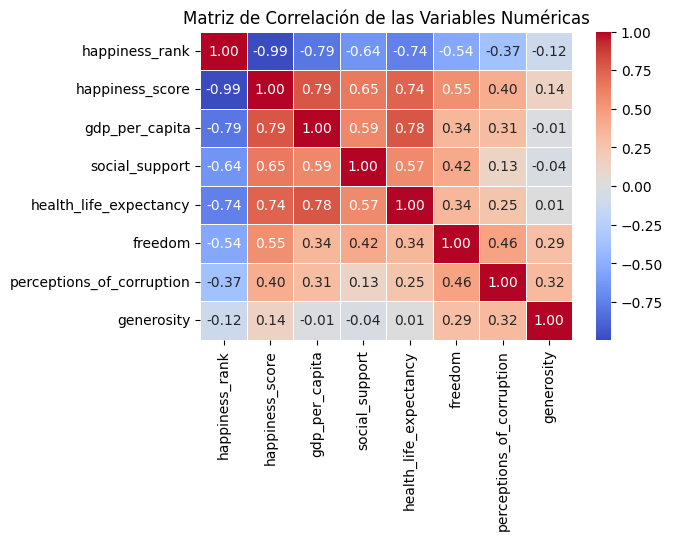

In [31]:
# Filtrar solo las columnas numéricas
numeric_df = df_concatenado.select_dtypes(include=['float64', 'int64'])

# Crear la matriz de correlación de las columnas numéricas
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()


* Happiness Rank y Happiness Score: Hay una fuerte correlación negativa (-0.99). Esto tiene sentido porque un menor Happiness Rank (número más bajo en el ranking) indica un mayor Happiness Score.

* GDP per Capita y Happiness Score: Correlación positiva alta (0.79), lo que sugiere que a medida que aumenta el PIB per cápita, los puntajes de felicidad también tienden a aumentar.

* Health (Life Expectancy) y Happiness Score: Alta correlación positiva (0.74), lo que indica que una mayor expectativa de vida saludable está relacionada con un mayor nivel de felicidad.

* Social Support y Happiness Score: Correlación positiva significativa (0.65), lo que muestra que un mayor apoyo social se asocia con mayor felicidad.
* Perceptions of Corruption: Correlación negativa con el Happiness Score (-0.40), lo que indica que a medida que la percepción de corrupción disminuye, el nivel de felicidad aumenta.

* Freedom y Happiness Score: Correlación positiva (0.55), lo que sugiere que los países con más libertad para tomar decisiones personales tienden a ser más felices.

Las variables que más influyen positivamente en la felicidad son:

* GDP per Capita.
* Health (Life Expectancy).
* Social Support.

Por otro lado, la percepción de corrupción tiene un impacto negativo en la felicidad, lo que significa que los países con menor percepción de corrupción tienden a ser más felices.

Histogramas de las variables numéricas para detectar distribución y outliers

<Figure size 800x600 with 0 Axes>

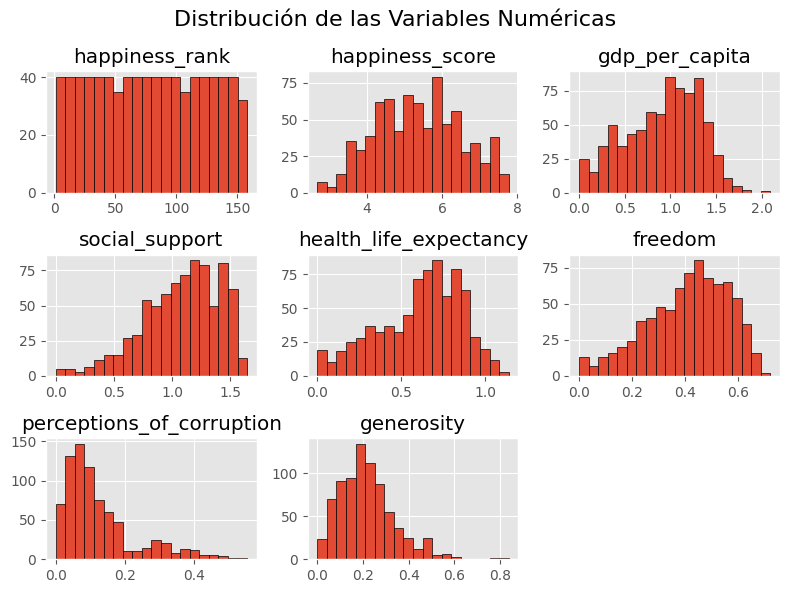

In [32]:
# Configuración para gráficos
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

df_concatenado.hist(bins=20, figsize=(8, 6), layout=(3, 3), edgecolor='black')
plt.suptitle('Distribución de las Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

* Happiness Rank: Distribución uniforme, los países se distribuyen equitativamente en el ranking de felicidad.
* Happiness Score: La mayoría de los países tienen puntajes de felicidad entre 4 y 7.
* GDP per Capita: La mayoría tiene un PIB bajo, con pocos países en el extremo superior.
* Social Support: La mayoría de los países tiene un alto apoyo social (alrededor de 1.5).
* Health (Life Expectancy): La expectativa de vida está concentrada entre 0.5 y 1.
* Freedom: La libertad percibida está entre 0.3 y 0.6.
* Perceptions of Corruption: La mayoría de los países tiene baja percepción de corrupción (< 0.2).
* Generosity: Predomina la generosidad baja, con pocos países en valores altos.

Gráfico 2: Comparación de Happiness Score entre los años.

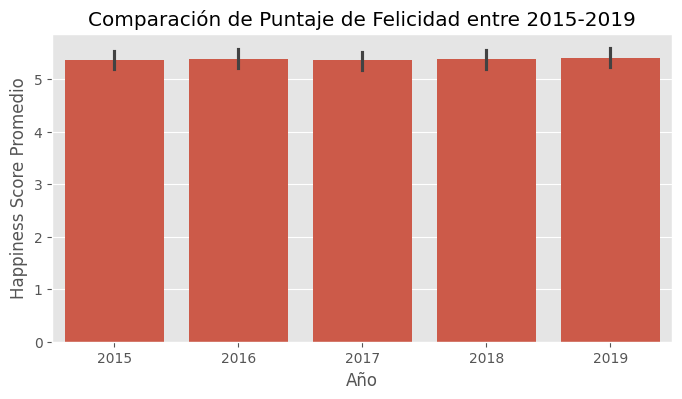

In [33]:
df_concatenado['year'] = pd.cut(df_concatenado.index, bins=[0, 157, 314, 469, 625, 782], labels=[2015, 2016, 2017, 2018, 2019])

plt.figure(figsize=(8, 4))
sns.barplot(x='year', y='happiness_score', data=df_concatenado, estimator='mean')
plt.title('Comparación de Puntaje de Felicidad entre 2015-2019')
plt.ylabel('Happiness Score Promedio')
plt.xlabel('Año')
plt.show()

* El puntaje de felicidad promedio se ha mantenido relativamente estable durante los años analizados, con pequeñas variaciones.
* El puntaje promedio está en torno a 5.3 para todos los años, sin cambios drásticos en el periodo.
* Las barras de error en la parte superior de cada barra indican la variabilidad del puntaje en cada año, y muestran que las diferencias entre los años son mínimas.

Gráfico 3: Comparación de GDP per Capita entre los años.

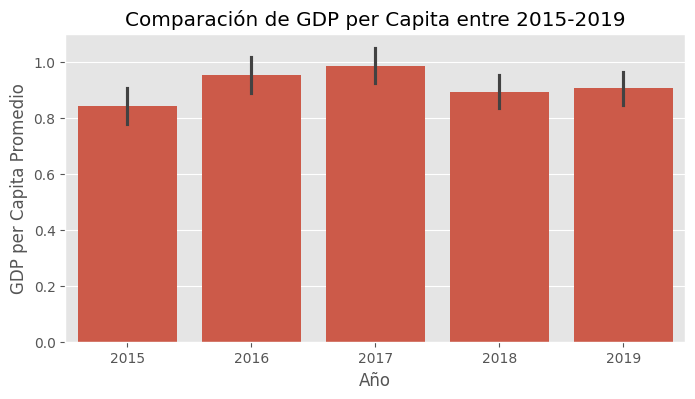

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(x='year', y='gdp_per_capita', data=df_concatenado, estimator='mean')
plt.title('Comparación de GDP per Capita entre 2015-2019')
plt.ylabel('GDP per Capita Promedio')
plt.xlabel('Año')
plt.show()

* El PIB per cápita promedio fue más bajo en 2015 en comparación con los años posteriores.
* El pico más alto ocurrió en 2017, donde el promedio del PIB per cápita fue el más elevado.
* En los años 2018 y 2019, el promedio del PIB per cápita disminuyó ligeramente en comparación con 2017, pero aún se mantiene más alto que en 2015.
* Las barras de error muestran la variabilidad de los datos en cada año, y aunque existen ligeras variaciones, no son extremadamente amplias.

### Análisis de distribución por cada columna.

#### Culumna country

Vamos a analizar los países del conjunto de datos.
Ya que hay muchos países, se van a divirdir en 6 continentes, para poder realizar un mejor análisis.

In [35]:
unique_countr = df_concatenado['country'].unique()
unique_countr

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [36]:
total_countries = len(unique_countr)
total_countries

170

Aquí podemos ver la cantidad total.

In [37]:
def continent(df : pd.DataFrame) -> pd.DataFrame:
    
    country_to_continent = {
         'New Zealand': 'oceania',
        'Australia': 'oceania',
        'Czech Republic': 'europe',
        'Northern Cyprus': 'europe',
        'Ireland': 'europe',
        'Switzerland': 'europe',
        'Belgium': 'europe',
        'Finland': 'europe',
        'North Macedonia': 'europe',
        'Iceland': 'europe',
        'United Kingdom': 'europe',
        'Netherlands': 'europe',
        'Denmark': 'europe',
        'Slovenia': 'europe',
        'Lithuania': 'europe',
        'Norway': 'europe',
        'Russia': 'europe',
        'Austria': 'europe',
        'Montenegro': 'europe',
        'Cyprus': 'europe',
        'North Cyprus': 'europe',
        'Kosovo': 'europe',
        'Romania': 'europe',
        'Hungary': 'europe',
        'Serbia': 'europe',
        'Portugal': 'europe',
        'Estonia': 'europe',
        'Latvia': 'europe',
        'Greece': 'europe',
        'Macedonia': 'europe',
        'Albania': 'europe',
        'Bosnia and Herzegovina': 'europe',
        'Croatia': 'europe',
        'Sweden': 'europe',
        'Luxembourg': 'europe',
        'Spain': 'europe',
        'Italy': 'europe',
        'Moldova': 'europe',
        'Malta': 'europe',
        'Ukraine': 'europe',
        'France': 'europe',
        'Slovakia': 'europe',
        'Bulgaria': 'europe',
        'Germany': 'europe',
        'Peru': 'south_america',
        'Uruguay': 'south_america',
        'Bolivia': 'south_america',
        'Argentina': 'south_america',
        'Colombia': 'south_america',
        'Venezuela': 'south_america',
        'Paraguay': 'south_america',
        'Chile': 'south_america',
        'Brazil': 'south_america',
        'Ecuador': 'south_america',
        'Suriname': 'south_america',
        'Trinidad and Tobago': 'north_america',
        'El Salvador': 'north_america',
        'Nicaragua': 'north_america',
        'Guatemala': 'north_america',
        'Canada': 'north_america',
        'Honduras': 'north_america',
        'Costa Rica': 'north_america',
        'Belize': 'north_america',
        'Trinidad & Tobago': 'north_america',
        'Puerto Rico': 'north_america',
        'Haiti': 'north_america',
        'Dominican Republic': 'north_america',
        'Jamaica': 'north_america',
        'Panama': 'north_america',
        'Mexico': 'north_america',
        'United States': 'north_america',
        'Palestinian Territories': 'asia',
        'Bangladesh': 'asia',
        'Thailand': 'asia',
        'Bahrain': 'asia',
        'Japan': 'asia',
        'Malaysia': 'asia',
        'Saudi Arabia': 'asia',
        'Uzbekistan': 'asia',
        'United Arab Emirates': 'asia',
        'Kazakhstan': 'asia',
        'Taiwan': 'asia',
         'Syria': 'asia',
        'Taiwan Province of China': 'asia',
        'Yemen': 'asia',
        'Afghanistan': 'asia',
        'Hong Kong S.A.R., China': 'asia',
        'Cambodia': 'asia',
        'Oman': 'asia',
        'Singapore': 'asia',
        'Israel': 'asia',
        'South Korea': 'asia',
        'Kuwait': 'asia',
        'Qatar': 'asia',
        'Myanmar': 'asia',
        'Tajikistan': 'asia',
        'Philippines': 'asia',
        'Hong Kong': 'asia',
        'Bhutan': 'asia',
        'Azerbaijan': 'asia',
        'Pakistan': 'asia',
        'Jordan': 'asia',
        'Kyrgyzstan': 'asia',
        'Turkmenistan': 'asia',
        'China': 'asia',
        'Indonesia': 'asia',
        'Vietnam': 'asia',
        'Turkey': 'asia',
        'Armenia': 'asia',
        'Laos': 'asia',
        'Mongolia': 'asia',
        'India': 'asia',
        'Georgia': 'asia',
        'Iraq': 'asia',
        'Sri Lanka': 'asia',
        'Lebanon': 'asia',
        'Nepal': 'asia',
        'Iran': 'asia',
        'South Africa': 'africa',
        'Ghana': 'africa',
        'Zimbabwe': 'africa',
        'Tunisia': 'africa',
        'Liberia': 'africa',
        'Sudan': 'africa',
        'Congo (Kinshasa)': 'africa',
        'Ethiopia': 'africa',
        'Sierra Leone': 'africa',
        'Mauritania': 'africa',
        'Kenya': 'africa',
        'Djibouti': 'africa',
        'Botswana': 'africa',
        'Mauritius': 'africa',
        'Libya': 'africa',
        'Mozambique': 'africa',
        'Lesotho': 'africa',
        'Somaliland region': 'africa',
        'Morocco': 'africa',
        'Nigeria': 'africa',
        'Swaziland': 'africa',
        'Algeria': 'africa',
        'Zambia': 'africa',
        'Malawi': 'africa',
        'Cameroon': 'africa',
        'Egypt': 'africa',
        'Angola': 'africa',
        'Burkina Faso': 'africa',
        'Congo (Brazzaville)': 'africa',
        'Somaliland Region': 'africa',
        'Comoros': 'africa',
        'Uganda': 'africa',
        'South Sudan': 'africa',
        'Senegal': 'africa',
        'Burundi': 'africa',
        'Namibia': 'africa',
        'Somalia': 'africa',
        'Mali': 'africa',
        'Ivory Coast': 'africa',
        'Gabon': 'africa',
        'Niger': 'africa',
        'Gambia': 'africa',
        'Tanzania': 'africa',
        'Madagascar': 'africa',
        'Benin': 'africa',
        'Central african Republic': 'africa',
        'Chad': 'africa',
        'Rwanda': 'africa',
        'Togo': 'africa',
        'Guinea': 'africa'
    }
    
    df_concatenado['continent'] = df_concatenado['country'].map(country_to_continent)
    return df_concatenado

df = continent(df)

Eliminamos la columna Country ya que ya tenemos los continentes, y happiness_rank, ya que no brinda información importante.

In [38]:
df_concatenado.drop(columns=['country', 'happiness_rank'], inplace=True, errors='ignore')

Gráfico de barras para mostrar la distribución de los continentes.

C:\Users\MAFE\AppData\Local\Temp\ipykernel_5048\1182754990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='continent', data=df, palette='Set2')


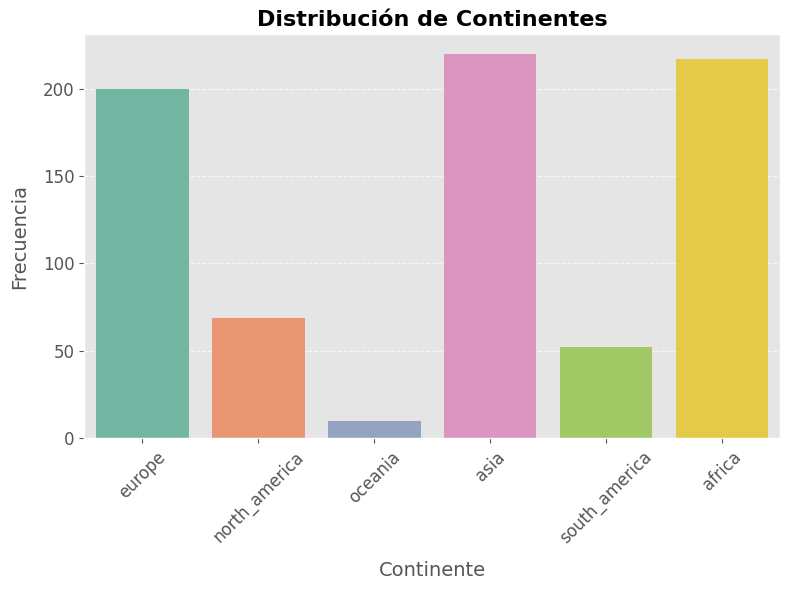

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='continent', data=df, palette='Set2')

# Título del gráfico
plt.title('Distribución de Continentes', fontsize=16, fontweight='bold')

# Etiquetas y estilos
plt.xlabel('Continente', fontsize=14, labelpad=10)
plt.ylabel('Frecuencia', fontsize=14, labelpad=10)

# Ajustes estéticos
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Agregar rejilla
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Asia, África, y Europa son los continentes con la mayor frecuencia, representando un gran número de países en el conjunto de datos.
* Oceanía y Sudamérica tienen las frecuencias más bajas.
* Norteamérica ocupa una posición intermedia en términos de frecuencia.

#### Columna happiness_score

Estadísticas Descriptivas de happiness_score:
count    782.000000
mean       5.379018
std        1.127456
min        2.693000
25%        4.509750
50%        5.322000
75%        6.189500
max        7.769000
Name: happiness_score, dtype: float64


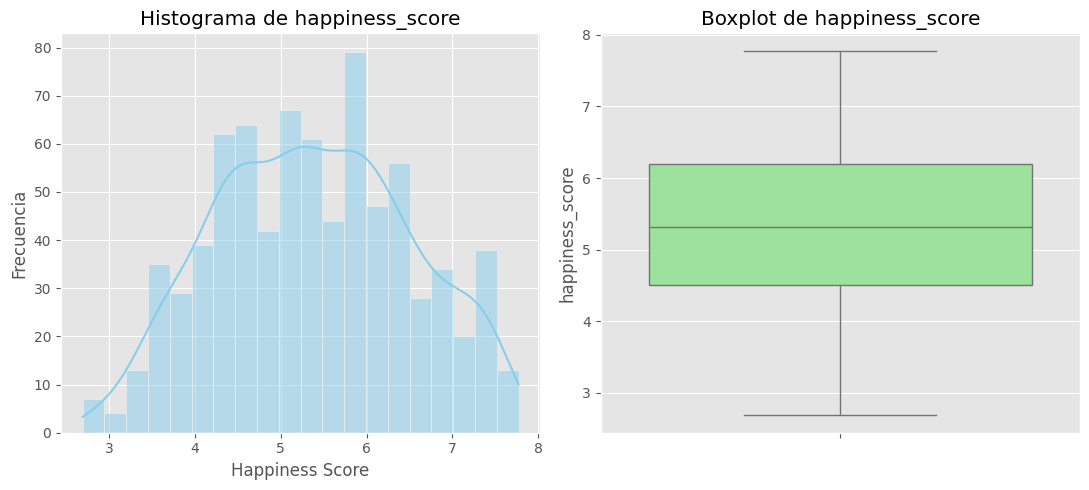

In [40]:
# Calcular estadísticas descriptivas
print("Estadísticas Descriptivas de happiness_score:")
print(df_concatenado['happiness_score'].describe())

# Crear la figura con subplots
plt.figure(figsize=(11, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['happiness_score'], kde=True, color='skyblue', bins=20)
plt.title('Histograma de happiness_score')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['happiness_score'], color='lightgreen')
plt.title('Boxplot de happiness_score')

plt.tight_layout()
plt.show()

El análisis de la distribución de los puntajes de felicidad muestra que la mayoría de los países tienen un puntaje entre 4.5 y 6.5, con un promedio de 5.41. La mediana es 5.38, lo que indica que la mitad de los países tienen un puntaje igual o inferior a este valor. No se observan valores atípicos significativos, y la variabilidad de los puntajes es moderada, con una desviación estándar de 1.11. En general, los puntajes de felicidad están distribuidos de manera relativamente uniforme, con una ligera tendencia hacia valores más altos.

#### Columna gdp_per_capita

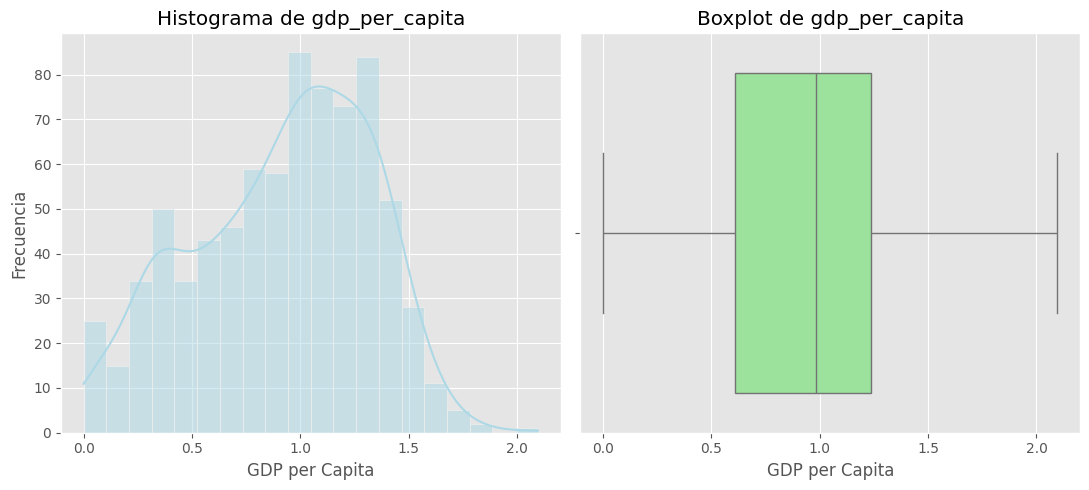

count    782.000000
mean       0.916047
std        0.407340
min        0.000000
25%        0.606500
50%        0.982205
75%        1.236187
max        2.096000
Name: gdp_per_capita, dtype: float64

In [41]:

# Generar el análisis para gdp_per_capita
gdp_stats = df_concatenado['gdp_per_capita'].describe()

# Crear gráficos de histograma y boxplot para gdp_per_capita
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_concatenado['gdp_per_capita'], bins=20, kde=True, color="lightblue")
plt.title('Histograma de gdp_per_capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_concatenado, x='gdp_per_capita', color="lightgreen")
plt.title('Boxplot de gdp_per_capita')
plt.xlabel('GDP per Capita')

plt.tight_layout()
plt.show()

gdp_stats

El análisis del PIB per cápita muestra que la mayoría de los países tienen un valor promedio cercano a 0.91, con pocos países extremos. La distribución tiene una acumulación alrededor del valor de 1, mientras que el valor máximo alcanza 1.87. El histograma indica que la mayoría de las economías se concentran cerca del promedio.

#### Columna social_support

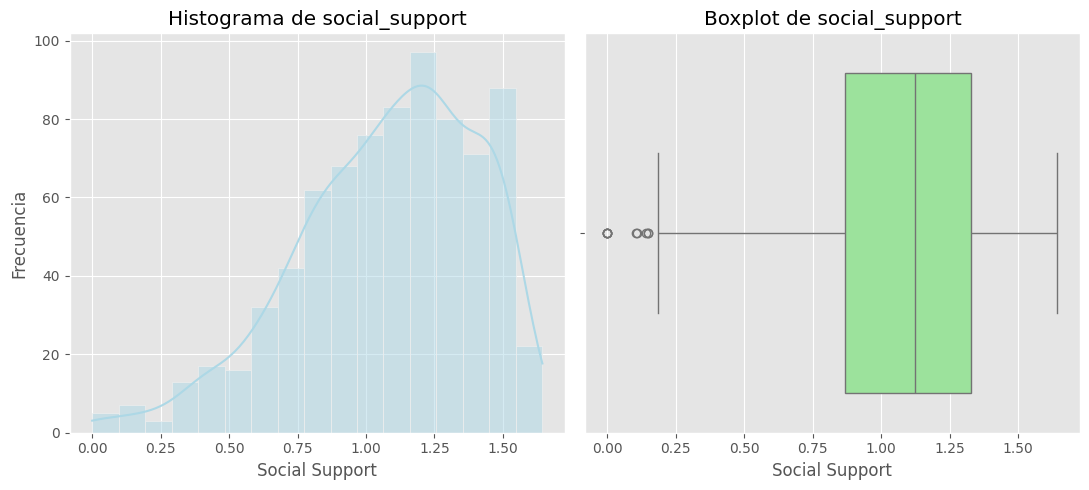

count    782.000000
mean       1.078392
std        0.329548
min        0.000000
25%        0.869363
50%        1.124735
75%        1.327250
max        1.644000
Name: social_support, dtype: float64


In [42]:
# Descriptive statistics
social_support_stats = df_concatenado['social_support'].describe()

# Plot the histogram and boxplot
plt.figure(figsize=(11, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df_concatenado['social_support'], kde=True, color='lightblue')
plt.title('Histograma de social_support')
plt.xlabel('Social Support')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_concatenado['social_support'], color='lightgreen')
plt.title('Boxplot de social_support')
plt.xlabel('Social Support')

plt.tight_layout()
plt.show()

# Print descriptive statistics
print(social_support_stats)


El análisis de la columna social_support muestra que el apoyo social promedio es de aproximadamente 1.078. El histograma presenta una distribución que está sesgada hacia la izquierda, con la mayoría de los países reportando altos niveles de apoyo social, cercanos a 1.5. El boxplot indica que la mayoría de los datos están agrupados entre 0.87 y 1.32, con algunos outliers por debajo de 0.25, lo que refleja países con niveles significativamente bajos de apoyo social.

#### Columna health_life_expectancy

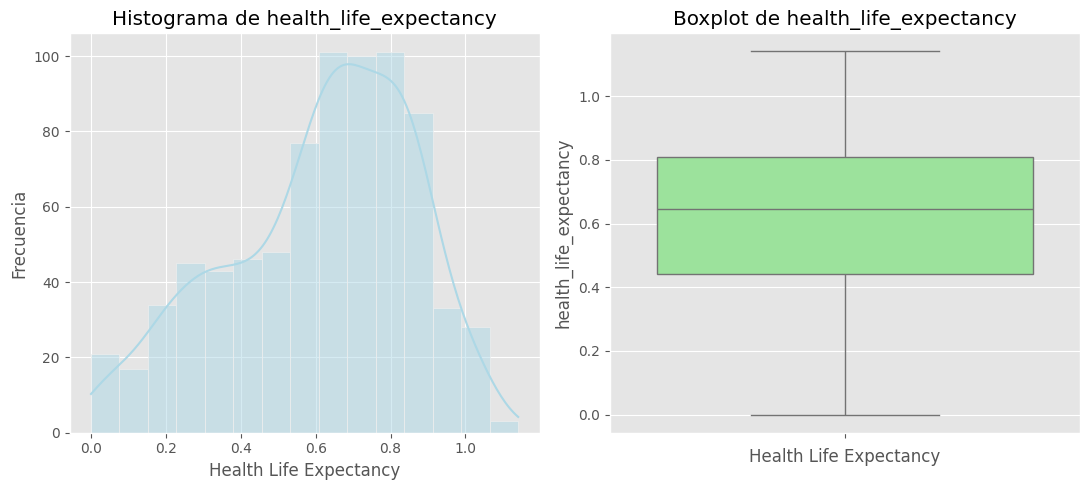

count    782.000000
mean       0.612416
std        0.248309
min        0.000000
25%        0.440183
50%        0.647310
75%        0.808000
max        1.141000
Name: health_life_expectancy, dtype: float64


In [43]:
# Descriptive statistics for health_life_expectancy
health_life_expectancy_stats = df_concatenado['health_life_expectancy'].describe()

# Plotting the histogram and boxplot for health_life_expectancy
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_concatenado['health_life_expectancy'], kde=True, color='lightblue')
plt.title('Histograma de health_life_expectancy')
plt.xlabel('Health Life Expectancy')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(df_concatenado['health_life_expectancy'], color='lightgreen')
plt.title('Boxplot de health_life_expectancy')
plt.xlabel('Health Life Expectancy')

plt.tight_layout()
plt.show()

# Displaying the descriptive statistics
print(health_life_expectancy_stats)


El análisis de la columna health_life_expectancy muestra que la media es de 0.61, lo que indica que, en promedio, la expectativa de vida saludable es relativamente alta entre los países analizados. El histograma revela que la mayoría de los países tienen valores cercanos a 0.6 o superiores, mientras que el boxplot muestra que hay algunos valores cercanos a 0, que podrían considerarse como outliers, y reflejan países con una expectativa de vida saludable más baja.

#### Columna freedom

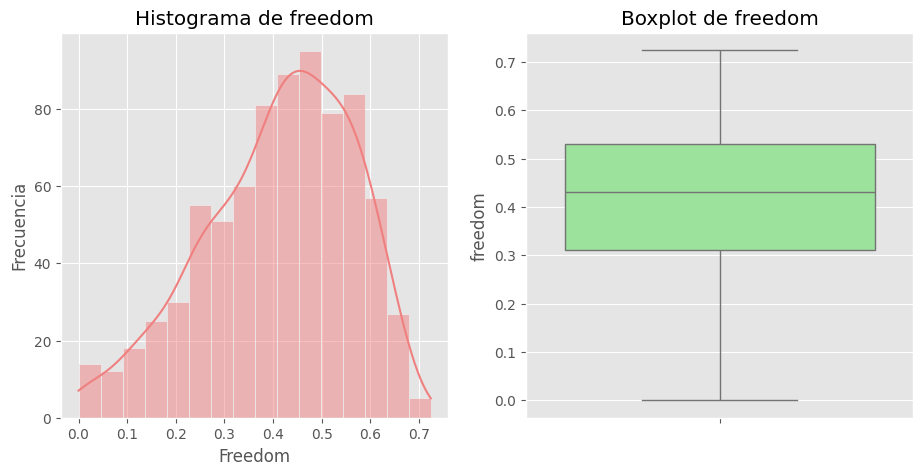

(count    782.000000
 mean       0.411091
 std        0.152880
 min        0.000000
 25%        0.309768
 50%        0.431000
 75%        0.531000
 max        0.724000
 Name: freedom, dtype: float64,
 None)

In [44]:
# Calcular estadísticas descriptivas de la columna freedom
freedom_stats = df_concatenado['freedom'].describe()

# Visualización
plt.figure(figsize=(11, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_concatenado['freedom'], kde=True, color='lightcoral')
plt.title('Histograma de freedom')
plt.xlabel('Freedom')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_concatenado['freedom'], color='lightgreen')
plt.title('Boxplot de freedom')

# Mostrar estadísticas descriptivas y gráficos
freedom_stats, plt.show()

El análisis de la columna freedom revela que la mayoría de los países tienen puntuaciones de libertad en un rango entre 0.3 y 0.6, con una media de 0.41. El histograma muestra una distribución sesgada hacia la derecha, indicando que existen países con niveles relativamente bajos de libertad. El boxplot refleja que la mediana se encuentra alrededor de 0.43, y aunque la mayoría de los países se agrupan en el rango intercuartílico entre 0.31 y 0.53, hay algunos valores mínimos cercanos a 0, lo que indica posibles países con muy poca libertad.

#### Columna perceptions_of_corruption

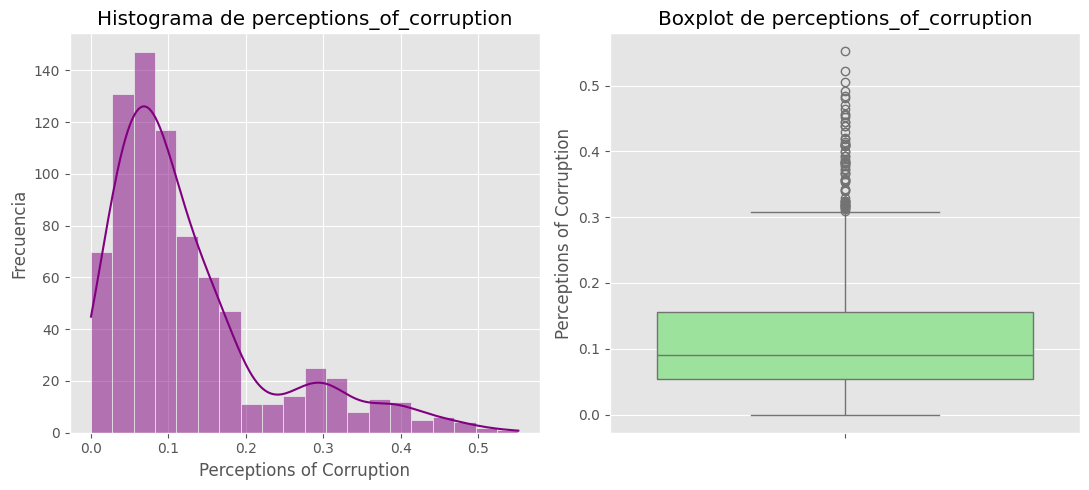

count    781.000000
mean       0.125436
std        0.105816
min        0.000000
25%        0.054000
50%        0.091000
75%        0.156030
max        0.551910
Name: perceptions_of_corruption, dtype: float64

In [45]:
# Calcular estadísticas descriptivas y generar gráficos para la columna perceptions_of_corruption
perceptions_of_corruption_stats = df_concatenado['perceptions_of_corruption'].describe()

# Graficar histograma y boxplot
plt.figure(figsize=(11, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_concatenado['perceptions_of_corruption'], kde=True, color='purple', bins=20)
plt.title('Histograma de perceptions_of_corruption')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_concatenado['perceptions_of_corruption'], color='lightgreen')
plt.title('Boxplot de perceptions_of_corruption')
plt.ylabel('Perceptions of Corruption')

# Mostrar estadísticas descriptivas y gráficos
plt.tight_layout()
plt.show()

perceptions_of_corruption_stats

La mayoría de los países tienen una baja percepción de corrupción, con valores concentrados entre 0.05 y 0.15. Sin embargo, algunos países presentan valores más altos, lo que indica disparidades en la percepción de corrupción.

#### Columna generosity

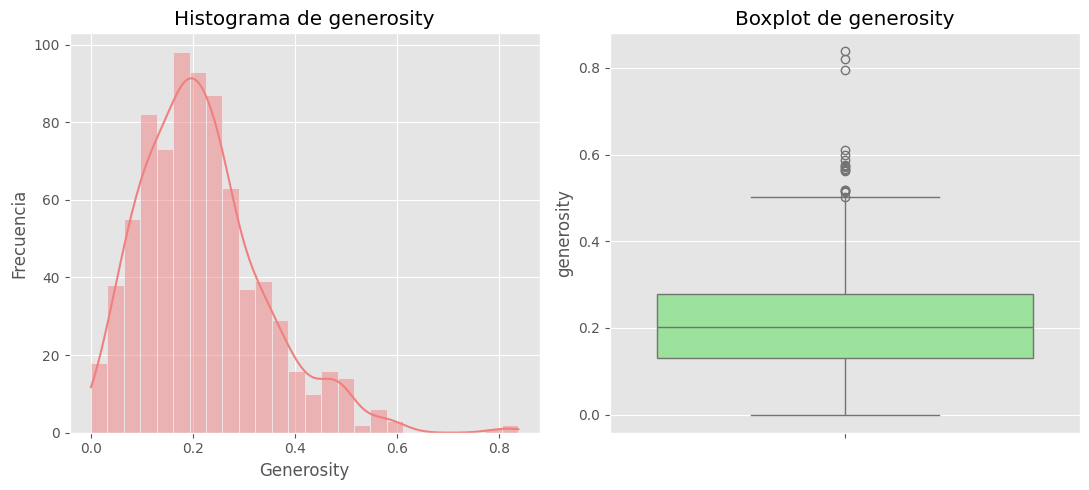

count    782.000000
mean       0.218576
std        0.122321
min        0.000000
25%        0.130000
50%        0.201982
75%        0.278832
max        0.838075
Name: generosity, dtype: float64

In [46]:
# Calcular estadísticas descriptivas para la columna generosity
generosity_stats = df_concatenado['generosity'].describe()

# Generar histograma y boxplot para la columna generosity
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_concatenado['generosity'], kde=True, color='lightcoral')
plt.title('Histograma de generosity')
plt.xlabel('Generosity')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_concatenado['generosity'], color='lightgreen')
plt.title('Boxplot de generosity')

# Mostrar estadísticas descriptivas y gráficos
plt.tight_layout()
plt.show()

generosity_stats

La columna generosity muestra una distribución sesgada hacia la derecha, con la mayoría de los valores concentrados entre 0 y 0.3. Los outliers en el boxplot indican que algunos países tienen niveles de generosidad más altos. La media es de 0.218, reflejando que la generosidad tiende a ser baja en la mayoría de los países.

Revisamos el dataset limpio antes de guardarlo.

In [47]:
df_concatenado.head()

,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,perceptions_of_corruption,generosity,year,continent
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,NaN,europe
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,europe
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,europe
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,europe
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,north_america


In [48]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   happiness_score            782 non-null    float64 
 1   gdp_per_capita             782 non-null    float64 
 2   social_support             782 non-null    float64 
 3   health_life_expectancy     782 non-null    float64 
 4   freedom                    782 non-null    float64 
 5   perceptions_of_corruption  781 non-null    float64 
 6   generosity                 782 non-null    float64 
 7   year                       781 non-null    category
 8   continent                  768 non-null    object  
dtypes: category(1), float64(7), object(1)
memory usage: 50.0+ KB


In [56]:
df_cleaned = df_concatenado.dropna(subset=["perceptions_of_corruption", "year", "continent"])

In [57]:
# Verificar las columnas actuales en el DataFrame
print(df_cleaned.columns)

Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'health_life_expectancy', 'freedom', 'perceptions_of_corruption',
       'generosity', 'year', 'continent'],
      dtype='object')


In [58]:
# Verificar las columnas antes de la transformación
print("Columnas originales:")
print(df_concatenado.columns)

# Transformar únicamente la columna 'continent' usando One-Hot Encoding, sin alterar las demás columnas
if 'continent' in df_cleaned.columns:
   df_cleaned = pd.get_dummies(df_cleaned, columns=['continent'], drop_first=False)

# Verificar las columnas después de la transformación para asegurarse de que las demás no han sido modificadas
print("Columnas después de One-Hot Encoding solo para 'continent':")
print(df_cleaned.columns)

Columnas originales:
Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'health_life_expectancy', 'freedom', 'perceptions_of_corruption',
       'generosity', 'year', 'continent'],
      dtype='object')
Columnas después de One-Hot Encoding solo para 'continent':
Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'health_life_expectancy', 'freedom', 'perceptions_of_corruption',
       'generosity', 'year', 'continent_africa', 'continent_asia',
       'continent_europe', 'continent_north_america', 'continent_oceania',
       'continent_south_america'],
      dtype='object')


In [59]:
df_cleaned.head()

,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,perceptions_of_corruption,generosity,year,continent_africa,continent_asia,continent_europe,continent_north_america,continent_oceania,continent_south_america
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,False,False,True,False,False,False
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,False,False,True,False,False,False
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,False,False,True,False,False,False
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,False,False,False,True,False,False
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,False,False,True,False,False,False


In [60]:
# Convertir todas las columnas booleanas (continent) a enteros (0 y 1)
df_cleaned[['continent_africa', 'continent_asia', 'continent_europe', 
    'continent_north_america', 'continent_oceania', 'continent_south_america']] = df_cleaned[['continent_africa', 'continent_asia', 'continent_europe', 
    'continent_north_america', 'continent_oceania', 'continent_south_america']].astype(int)

In [61]:
df_cleaned.head()

,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,perceptions_of_corruption,generosity,year,continent_africa,continent_asia,continent_europe,continent_north_america,continent_oceania,continent_south_america
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0,0,1,0,0,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0,0,1,0,0,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0,0,1,0,0,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0,0,0,1,0,0
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,0,0,1,0,0,0


Finalmente guardamos el dataset para continuar con el model training.

In [62]:
# Guardar el DataFrame limpio en la carpeta 'data'
df_cleaned.to_csv('../data/datos_limpios.csv', index=False)